In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
import mplfinance as mpf
# %matplotlib inline
import statsmodels.api as sm
import seaborn as sns 
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
# 
# import cufflinks as cf # Connects Plotly to Pandas
# # Makes Plotly work in your Notebook
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# init_notebook_mode(connected=True)
# cf.go_offline()

## Setup the Data

In [3]:
df_1 = pd.read_csv('/Users/datpro/Documents/gitdatpro/data-analysis-python-projects/time-series-analysis/data/AMZN.csv', index_col='Date', parse_dates=True)
df_1.index

DatetimeIndex(['2019-10-16', '2019-10-17', '2019-10-18', '2019-10-21',
               '2019-10-22', '2019-10-23', '2019-10-24', '2019-10-25',
               '2019-10-28', '2019-10-29',
               ...
               '2020-10-02', '2020-10-05', '2020-10-06', '2020-10-07',
               '2020-10-08', '2020-10-09', '2020-10-12', '2020-10-13',
               '2020-10-14', '2020-10-15'],
              dtype='datetime64[ns]', name='Date', length=253, freq=None)

# Visualizations

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


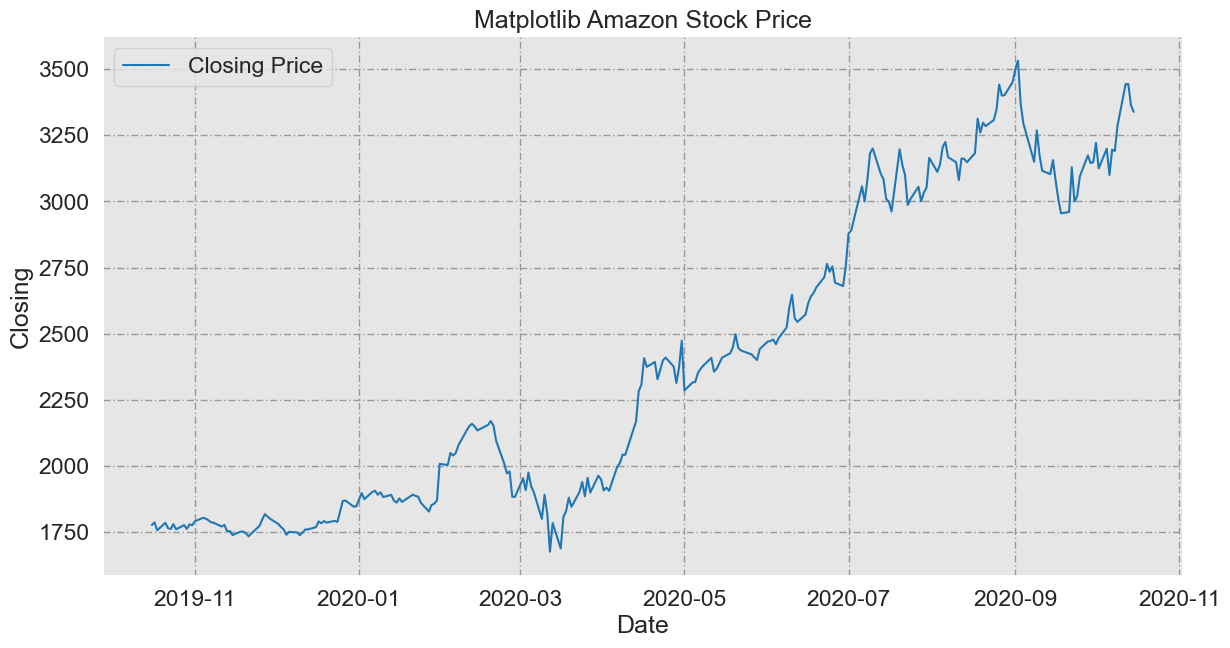

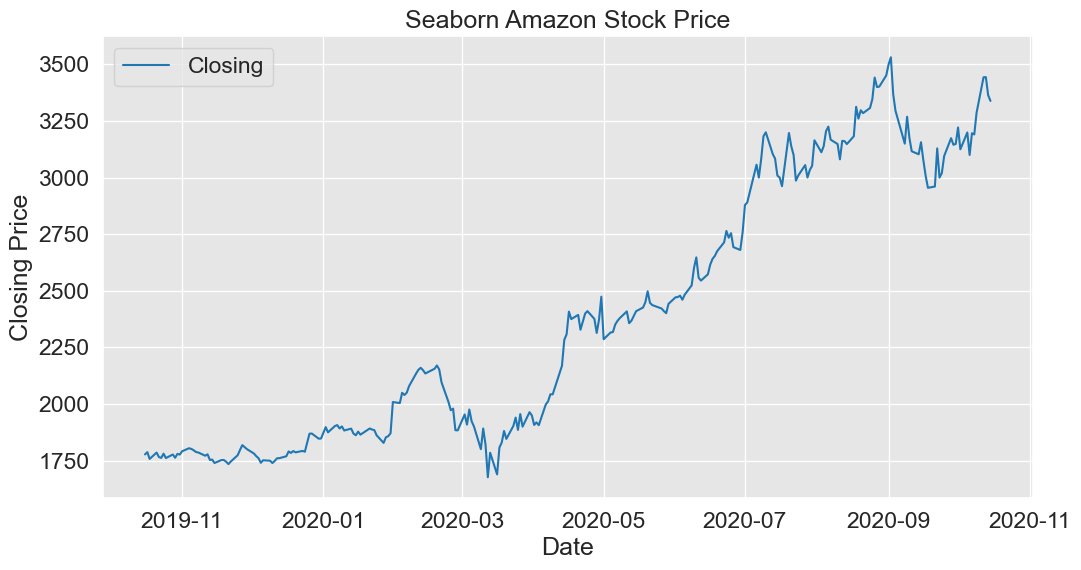

In [13]:
# Matplotlib
fig_1 = plt.figure(figsize=(12,6), dpi=100)
axes_1 = fig_1.add_axes([0.0, 0.0, 0.9, 0.9])
axes_1.set_xlabel('Date')
axes_1.set_ylabel('Closing')
axes_1.set_title('Matplotlib Amazon Stock Price')
axes_1.plot(df_1.index, df_1['Close'], label='Closing Price')
axes_1.legend(loc=0)
axes_1.grid(True, color='0.6', dashes=(5,2,1,2))

#Seaborn
fig_3 = plt.figure(figsize=(12,6), dpi=100)
axes_2 = sns.lineplot(data=df_1, x=df_1.index, y='Close', label='Closing')
axes_2.set(xlabel='Date', ylabel='Closing Price')
axes_2.set_title('Seaborn Amazon Stock Price')
axes_2.legend(loc=0)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("notebook", font_scale = 1.5, rc={"lines.linewitdth":2.5})

## Plotly

In [18]:
fig_2 = go.Figure()
fig_2.add_trace(go.Scatter(x=df_1.index, y=df_1['Close'],
                           mode='lines',
                           name='Closing Price'))
fig_2.update_layout(
    xaxis=dict(
        showgrid=True, showline=True, showticklabels=True
    ),
    yaxis=dict(
        showgrid=True, showline=True, showticklabels=True
    ),
    showlegend=True,
    xaxis_title='Date',
    yaxis_title='Closing Price',
    title='Plotly amazon Stock Price'
)

## Matplotlib Finance

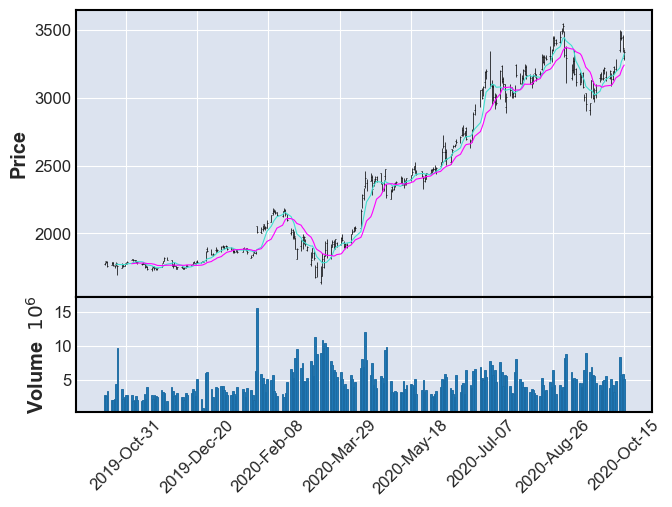

In [31]:
mpf.plot(df_1, type='ohlc', mav=(7,14), volume=True, show_nontrading=True)

## Plotting time Periods and Styling

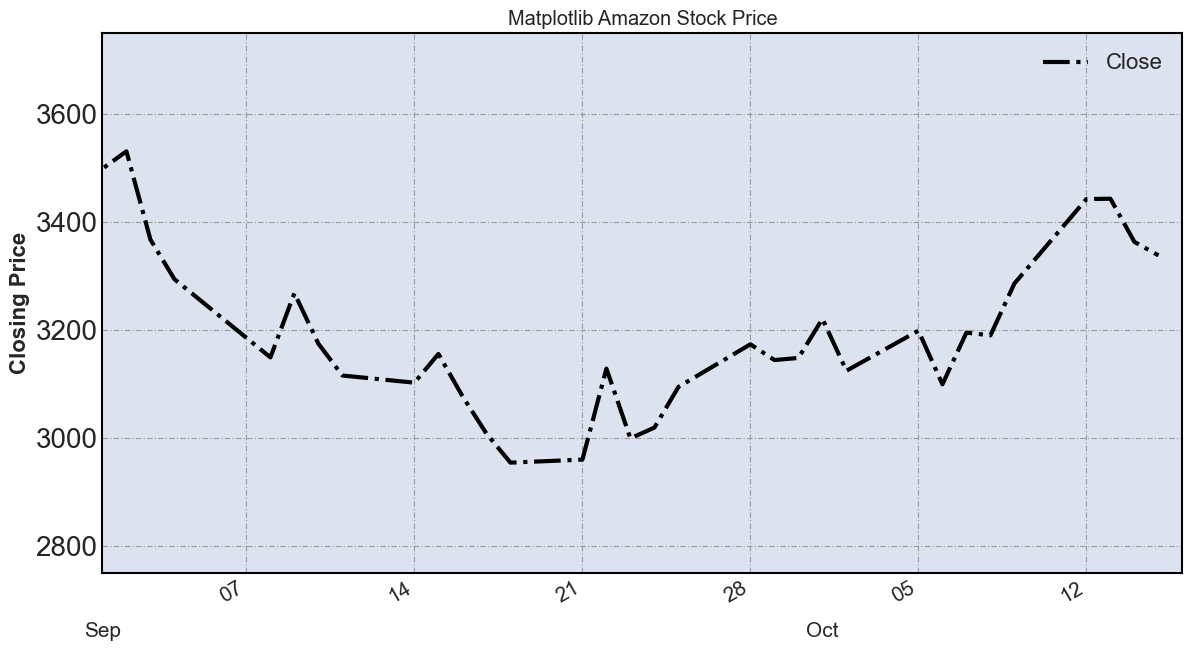

In [46]:
# Matplotlib
fig_1 = plt.figure(figsize=(12,6), dpi=100)
ax_1 = fig_1.add_axes([0.0, 0.0, 0.9, 0.9])
ax_1.set_xlabel('Date')
ax_1.set_ylabel('Closing')
ax_1.set_title('Matplotlib Amazon Stock Price')

df_1['Close'].plot(figsize=(12,6),
                   xlim=['2020-09-01','2020-10-16'],
                   ylim=[2750,3750],
                   color='black',
                   lw=3,
                   ls='-.')
ax_1.legend(loc=0)
ax_1.grid(True, color='0.6', dashes=(5,2,1,2))

ax_1.tick_params(axis="x", labelsize=15)
ax_1.tick_params(axis="y", labelsize=20)

plt.xlabel('', fontsize=18)
plt.ylabel('Closing Price', fontsize=16)

plt.legend(loc=0, prop={'size':16})

# Set so that only month and day shows
# https://matplotlib.org/api/dates_api.html
# %Y - 4 digit year
# %y - 2 digit year
# %m - month as a number 
# %b - month as abbreviated name
# %d - day
# %a - abbreviated day
# ax_1.xaxis.set_major_formatter(dates.DateFormatter('%m/%d'))

ax_1.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))

ax_1.xaxis.set_major_formatter(dates.DateFormatter('%d'))

ax_1.xaxis.set_minor_locator(dates.MonthLocator())

ax_1.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

ax_1.tick_params(axis='both', which='minor', labelsize=15)